In [13]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load Pima Indians Diabetes dataset (assuming it's already loaded as 'df' and 'y')
# X = iris.data                  # All 4 features
# y = iris.target                # Labels: 0, 1, 2
X = df.drop('Outcome', axis=1) # Features are all columns except 'Outcome'
y = df['Outcome']              # Labels are in the 'Outcome' column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with linear kernel (supports multiclass)
svm_model = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')  # One-vs-Rest strategy
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
# Since this is a binary classification problem, target_names can be simplified
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

Confusion Matrix:
[[123  28]
 [ 30  50]]

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.80      0.81      0.81       151
    Diabetic       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



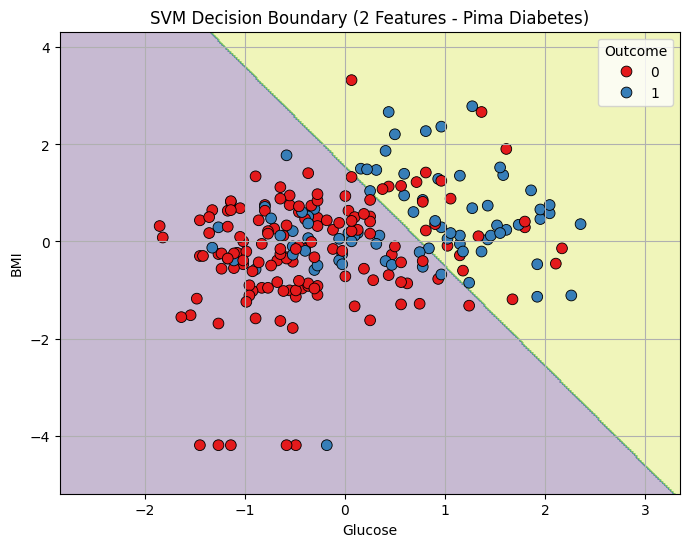

In [16]:
# Reduce to 2 features for 2D plot (using Glucose and BMI as examples)
# X_2D = X[:, :2] # This was for Iris dataset
X_2D = df[['Glucose', 'BMI']] # Selecting Glucose and BMI for the Pima dataset
y_2D = df['Outcome'] # Using the Outcome column as labels

X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D, y_2D, test_size=0.3, random_state=42)
X_train_2D = scaler.fit_transform(X_train_2D)
X_test_2D = scaler.transform(X_test_2D)

model_2D = SVC(kernel='linear', C=1.0)
model_2D.fit(X_train_2D, y_train_2D)

def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', s=60, edgecolor='k')
    plt.title("SVM Decision Boundary (2 Features - Pima Diabetes)")
    plt.xlabel("Glucose") # Changed xlabel to reflect the feature
    plt.ylabel("BMI")     # Changed ylabel to reflect the feature
    plt.grid(True)
    plt.show()

# Need to convert the X_test_2D and y_test_2D back to numpy arrays for the plotting function
plot_decision_boundary(X_test_2D, y_test_2D, model_2D)